In [1]:
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

df = pd.read_csv('CAvideos.csv')


#展示数据的格式
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


## 1. 数据摘要
### 1.1 数据属性

In [2]:
# 观察数据的属性
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

#### 整个数据有16列 其中 category_id，views，likes，dislikes ，comment_count为数值属性；comments_disabled，ratings_disabled ，video_error_or_removed  为二值属性，其余为标称属性。       
其中每一种属性代表的意义如下：
1. video_id:视频编号
2. trending_date：流行日日期
3. title：视频的标题
4. channel_title：频道的标题
5. category_id：种类的编号
6. publish_time：发布的时间
7. tags：视频的标签
8. views：视频的浏览量
9. likes： 视频的点赞量
10. dislikes： 视频的点灭量
11. comment_count： 评价的数量
12. thumbnail_link:链接
13. comments_disabled：是否关闭评论
14. ratings_disabled：是否关闭评分
15. video_error_or_removed：视频错误或者被移除
16. description：视频描述

### 1.2 数值属性缺失值个数

In [3]:
# 统计每一列（每一种属性）值为空的个数
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

#### 只有description一列有空缺值，其他都没有空缺值。

###  1.3 数值属性五数描述

In [4]:
# 获取数值属性的数据统计信息，包含五数描述
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


### 1.4 标称属性每种类别的频数
#### 由于总共有多种标称属性，每一种标称属性都有很多值，因此这里只展示每一个标称属性中出现频数最高的5个值。

In [5]:
#流行日期中每种类别出现的频数
df['trending_date'].value_counts().head(5)

17.06.12    200
18.06.05    200
18.21.05    200
17.18.11    200
18.16.05    200
Name: trending_date, dtype: int64

In [6]:
#标题属性中每种类别出现的频数
df['title'].value_counts().head(5)

Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018             15
Drake - God's Plan (Official Audio)                                                                  15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018    13
Deleted video                                                                                        11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                 10
Name: title, dtype: int64

In [7]:
#频道标题属性中每种类别出现的频数
df['channel_title'].value_counts().head(5)


SET India          192
MSNBC              189
FBE                188
The Young Turks    186
REACT              183
Name: channel_title, dtype: int64

In [8]:
#发布时间属性中每种类别出现的频数
df['publish_time'].value_counts().head(5)

2017-12-20T23:00:00.000Z    11
2018-02-11T15:00:01.000Z    10
2017-11-18T17:00:00.000Z    10
2018-01-29T04:00:00.000Z    10
2018-03-11T16:00:00.000Z    10
Name: publish_time, dtype: int64

In [9]:
#标签属性中每种类别出现的频数
df['tags'].value_counts().head(5)

[none]                                                                                                                                                                                                                   2385
the real|"daytime"|"talk show"|"women"|"tamera mowry"|"adrienne bailon"|"loni love"|"jeannie mai"                                                                                                                         127
best vines 2018|"funny vines"|"funny videos"|"funniest videos 2018"                                                                                                                                                       120
Vaani rani|"rani"|"Radhika in funny character"|"venu aravind"|"SunTV"|"VaniRani"|"vani"|"vaani"|"Radhika's dual role serial"|"Ranimma veetu kuripu"|"Radhika as lawyer in serial"|"radikaa"|"rathika"|"Radhika's new"     116
senegal|"video"|"divertissement"|"humour"|"youssou ndour;musique"|"série"|"téléfilm"|"theatre"                  

In [10]:
#描述中每种类别出现的频数
df['description'].value_counts().head(5)

Subscribers Link: http://bit.ly/2qb69dZ\n\nConnect with Radaan Media online: http://bit.ly/2rGVWHT\n\nVisit our WEBSITE: https://www.radaan.tv\n\nLike us on FACEBOOK: http://bit.ly/2qLmgTm\n\nFollow us on TWITTER: http://bit.ly/2r8gZGD\n\nVAANI RANI SYNOPSIS\nTwin sister’s Vaani and Rani get married to an elder and younger brother of the same family respectively. Vaani the elder one is a well read attorney and the younger one Rani is a failure in education with not even going beyond 10thclass. Though both have extreme ideologies of life Rani is a favorite among neighbors with her uncanny innocent approach. Vaani is a roaring lion at the court room who is looked up as a role model to so many upcoming lawyers for her advocating abilities, whereas Rani is a well versed home maker. Not only with the sisters remain with this extremity but even their respective husband’s share the same dose of luck….Vaani is a mother of 2 children and Rani has three children who are in their teens. Volcanoes

### 1.5 数据可视化
#### 整个数据有16列 其中 category_id，views，likes，dislikes ，comment_count为数值属性；comments_disabled，ratings_disabled ，video_error_or_removed 为二值属性，其余为标称属性。
#### 1.5.1 对数值属性做直方图和盒图观察其数据分布以及离群点。

array([[<AxesSubplot:title={'center':'category_id'}>,
        <AxesSubplot:title={'center':'views'}>],
       [<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'dislikes'}>],
       [<AxesSubplot:title={'center':'comment_count'}>, <AxesSubplot:>]],
      dtype=object)

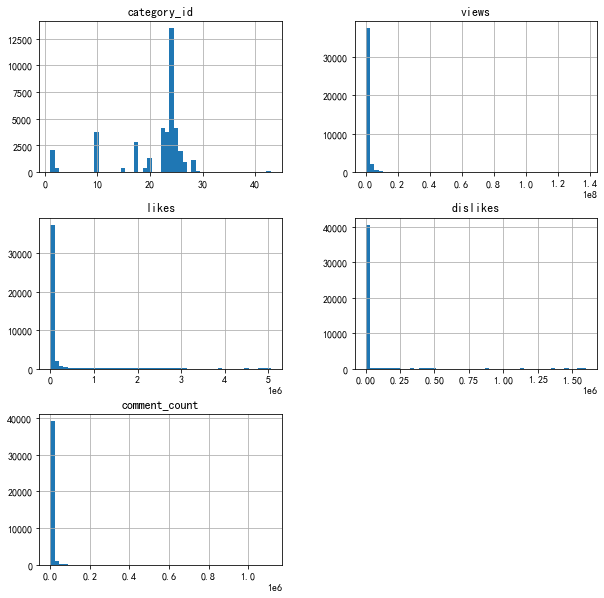

In [11]:
#类别和点赞数，点灭数，观看数，评价数的数据分布
df1 = df[['category_id','views','likes','dislikes','comment_count']]
df1.hist(figsize=(10,10),bins=50)

#### 从统计直方图来看，观看数，点赞数，点灭数，评价数都服从幂律分布。
#### 如果将category_id按照数量排序，而不是以id排序，其分布也服从幂律分布。
#### 1.5.2 做数值属性的盒图观察其离群点

category_id         AxesSubplot(0.125,0.125;0.133621x0.755)
views            AxesSubplot(0.285345,0.125;0.133621x0.755)
likes             AxesSubplot(0.44569,0.125;0.133621x0.755)
dislikes         AxesSubplot(0.606034,0.125;0.133621x0.755)
comment_count    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

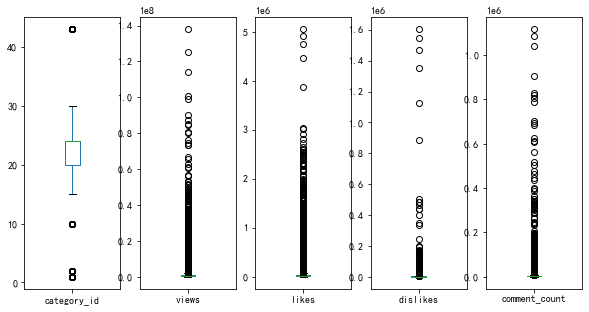

In [12]:
#数值属性的盒图
df1.plot.box(figsize=(10,5),subplots=True)

#### category_id：绝大部分位于15-30之间，30之上有一 个离群点，10之下有3个离群点。
#### 观看数，点赞数，点灭数，评价数：均值处于下方，上方存在着很多的离群点，这些离群点代表某些视频存在少量高于数据均值的统计数据。

#### 1.5.3 作二值属性的饼状图，观察其中每种类别的占比。

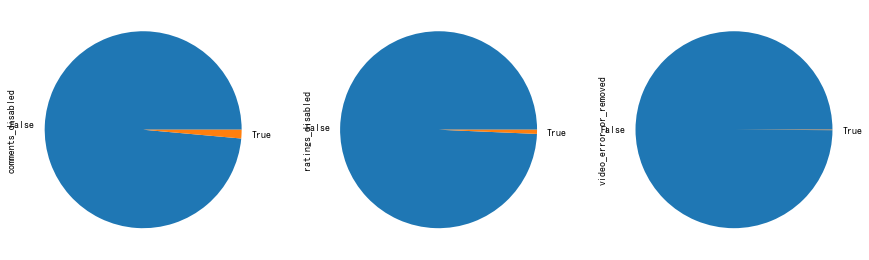

In [13]:
#二值属性的饼状图
fig=plt.figure(3,figsize=(15,15))##增添画布，必须要有这一步
fig.set(alpha=0.2)
#是否禁止评论
ax1=fig.add_subplot(1,3,1)  ##切割画布，并且定位画布到1行4列的第一个.plot(kind='bar', label="female highclass", color='#FA2479')
df['comments_disabled'].value_counts().plot.pie()

#是否禁止评分
ax2=fig.add_subplot(1,3,2)
df['ratings_disabled'].value_counts().plot.pie()

#视频是否有错或删除
ax2=fig.add_subplot(1,3,3)
df['video_error_or_removed'].value_counts().plot.pie()

plt.show()

#### 可以发现，在三个饼状图中，值为True都只占了很少一部分，说明在youtube流行视频中很少有视频禁止评论，禁止评分或者将视频删除。

#### 1.5.4 做标称属性的直方图

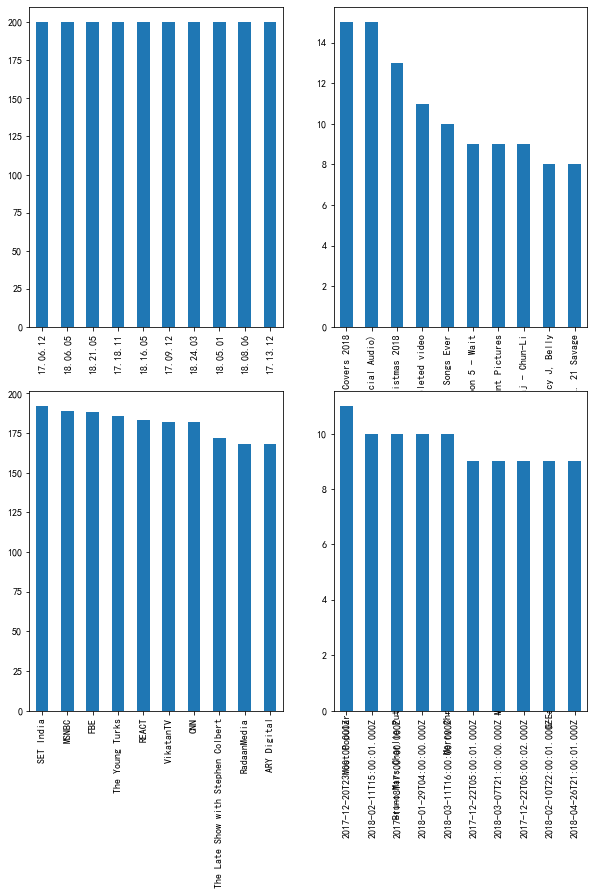

In [27]:
#标称属性的直方图


fig=plt.figure(5,figsize=(10,20))##增添画布，必须要有这一步
fig.set(alpha=0.2)
ax1=fig.add_subplot(3,2,1)  ##切割画布，并且定位画布到1行4列的第一个.plot(kind='bar', label="female highclass", color='#FA2479')
df['trending_date'].value_counts().head(10).plot(kind='bar')


ax2=fig.add_subplot(3,2,2)
df['title'].value_counts().head(10).plot(kind='bar')

ax3=fig.add_subplot(3,2,3)
df['channel_title'].value_counts().head(10).plot(kind='bar')

ax4=fig.add_subplot(3,2,4)
df['publish_time'].value_counts().head(10).plot(kind='bar')

# ax5=fig.add_subplot(3,2,5)
# df['tags'].value_counts().head(10).plot(kind='bar')


plt.show()

## 2. 数据缺失处理
### 2.1观察缺失数据，分析缺失原因。

In [15]:
#检查每一列缺失值的个数
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

#### 数据中仅有description字段发生缺失，这是由于其他属性都是一个视频所必须含有的，而描述属性可能是可选的。


### 2.2 将缺失部分剔除

In [16]:
df_drop = df.dropna()
# #删除前数值属性数据描述
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [17]:
df_drop.describe()

,category_id,views,likes,dislikes,comment_count
count,39585.000000,3.958500e+04,3.958500e+04,3.958500e+04,3.958500e+04
mean,20.778123,1.169234e+06,4.059694e+04,2.058693e+03,5.159716e+03
std,6.808714,3.437842e+06,1.345967e+05,1.931258e+04,2.189959e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.497150e+05,2.395000e+03,1.040000e+02,4.420000e+02
50%,24.000000,3.831200e+05,9.244000e+03,3.140000e+02,1.357000e+03
75%,24.000000,9.831390e+05,2.967000e+04,9.760000e+02,3.821000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


#### 删除含有缺失值的行后，总的记录条数从40881条降至39585条，删除后的视频的观看数，点赞数，点灭数，评论数都比删除前要高。这说明删除那些没有描述的视频能够提升整体视频的质量。
#### 对比将缺失值删除前后的数值属性数值分布：

<AxesSubplot:ylabel='Frequency'>

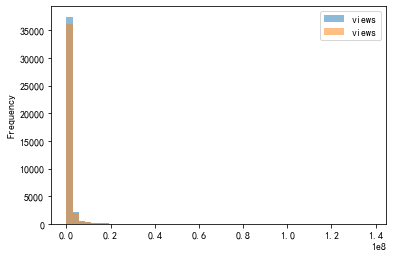

In [18]:
frames = [df['views'],df_drop['views']]
result = pd.concat(frames, axis=1)

result.plot.hist(alpha=0.5,bins=50)

#### 上图为删除空缺值前后的category_id数据分布对比，可以看出删除空缺值后，记录数量变少，整体的数据分布并没有发生太大变化。

### 2.3 用最高频率值来填补缺失值

In [19]:
#利用每一列最多的值来填充每一列中的空缺值。
value={'description':df.description.mode()} 
df_fill_mode = df.fillna(value)
value

{'description': 0    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
 dtype: object}

### 2.4 通过属性的相关关系来填补缺失值
#### 如果视频的描述空缺，我们可以考虑使用视频的title来填充视频的描述。

In [20]:
df_fill_title = df['description'].fillna(df['title'])
df_fill_title.isna().sum()

0

### 2.5 通过数据对象之间的相似性来填补缺失值

In [21]:
#可以通郭categry_id的距离找到最相似的视频，然后用该视频的description来填充空缺的description。

# #找出最相近的数据，并将其的价格返回
def most_similar(x,df):

    for item in  df['category_id'].values:
        if x.category_id  == item:
            return df[df['category_id']== item].description.mode()
        else:
            return ''

df_fill_similarity = df

df_fill_similarity['similar_description'] = df_fill_similarity.apply(lambda x: most_similar(x,df),axis=1)

df_fill_similarity = df_fill_similarity['description'].fillna(df_fill_similarity['similar_description'])

df_fill_similarity.isna().sum()

0